In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sp 
from function.SS_class import subset_simulation

In [2]:
#black box phi 
def phi(X):
    return (np.power(X,2)).sum(axis = 0)

In [3]:
#testing the Chi2(d) exemple with the vae. 
########################## VAE capting the distribution #############
N = 1000
d = 20
Z = np.random.normal(size = (N,d)) 

On considère l'exemple suivant :
$X \sim \mathcal {N}_d(0, I_d)$ et $\mid \mid X \mid \mid^2 \sim \chi_2(d)$  

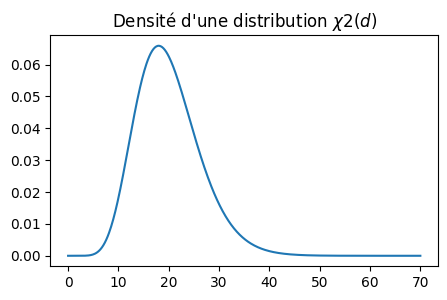

In [4]:
plt.figure(figsize= (5,3))
xx = np.linspace(0,70, 500)
plt.plot(xx, sp.chi2.pdf(xx, d));
plt.title(r"Densité d'une distribution $\chi2(d)$");

In [5]:
print('--------------------------------')
print(f"Theorical probability for our problem {np.round(1-sp.chi2.cdf(40,d), 5)} with a threshold of 55")

--------------------------------
Theorical probability for our problem 0.005 with a threshold of 55


Utilisation du noyau gaussian $$ \mathcal{N}_d(\frac{X}{\sqrt{1+c^2}}, \frac{c^2}{1+c^2} I_d) $$

Utilisation de c = 0.04

In [79]:
chain,  n_event, failure, quantile, accep = subset_simulation(Z.T, 55, phi, 2, .5, .04, vae_ss=False)

In [80]:
print(n_event, quantile )

13 [28.896943374665266, 37.456290291929776, 43.726831650045476, 45.187843437960865, 46.387710704000135, 47.41311525613613, 48.40863148993492, 49.35086167898832, 50.398600617298364, 51.39188480727944, 52.41128445702845, 53.37328489376253, 54.3155596138575, 55.20316423284778]


In [81]:
print(f"the probability estimation with SS {failure}")

the probability estimation with SS 1.720000000000001e-14


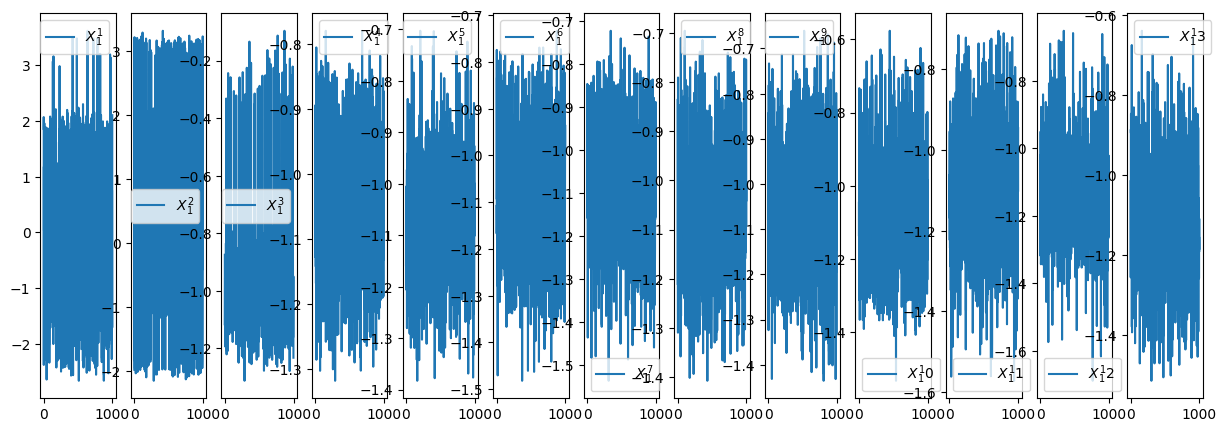

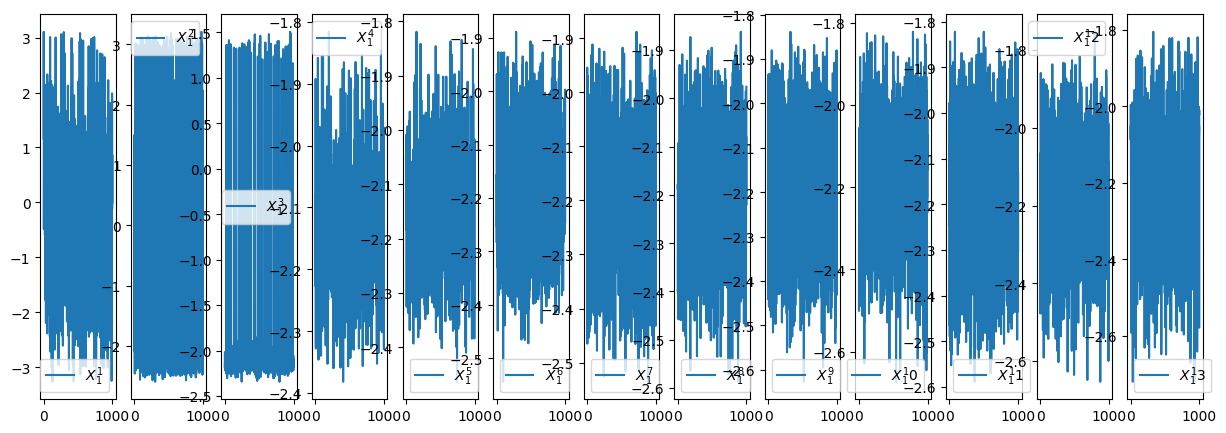

In [82]:
plt.figure(figsize= (15,5))
for i in range(len(chain)):
    plt.subplot(1,len(chain), i+1)
    plt.plot(chain[i][0], label = r"$X_1^%i$"%(i+1))
    plt.legend()

plt.figure(figsize= (15,5))
for i in range(len(chain)):
    plt.subplot(1,len(chain), i+1)
    plt.plot(chain[i][1], label = r"$X_1^%i$"%(i+1))
    plt.legend()

Beucoup de rejet dans les algorithmes MCMC 

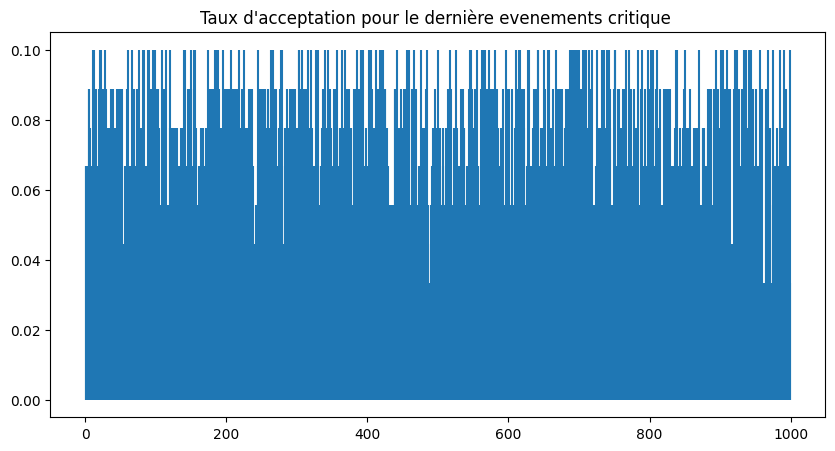

In [84]:
plt.figure(figsize=(10,5))
plt.vlines(np.arange(N)+.5, ymin=np.zeros(N), ymax=accep[-1]/10, linestyles='solid')
plt.title("Taux d'acceptation pour le dernière evenements critique ");

Exemple 2 : On considère la fonction $\phi$ : 
$$\phi(u_1, u_2) = 0.1 (u_1-u_2)^2 - 0.5 (u_1+ u_2) + 2.5 $$
Et $(U_1, U_2) \sim \mathcal{N}_2(0, I_2)$

In [12]:
def phi2(X):
    U = X[ 0]
    V = X[1]
    return -0.1 * (U-V)**2 +0.5 *  (U+V) 

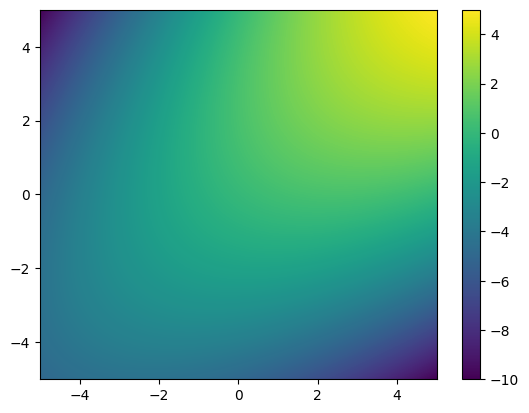

In [13]:
x = np.linspace(-5,5, 1000)
y = np.linspace(-5,5, 1000)
xx =np.meshgrid(x,y)
fig, ax = plt.subplots()
pc = ax.pcolormesh(xx[0],xx[1], phi2(xx))
fig.colorbar(pc);